In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
insurance=pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### We will check for any outliers in the data

In [5]:
desc=insurance['charges'].describe()
print(desc)

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


In [6]:
Q1=desc['25%']
Q3=desc['75%']
min_val = desc['min']
max_val = desc['max']
IQR = Q3 - Q1

In [7]:
Lowerfence=Q1-1.5*(IQR)
Upperfence=Q3+1.5*(IQR)
print(Lowerfence)
print(Upperfence)

-13109.1508975
34489.350562499996


### Checking the skewness of the charges data (It is skewed if its  > 1 or < -1 )

In [8]:
insurance['charges'].skew()

1.5158796580240388

### The charges are skewed

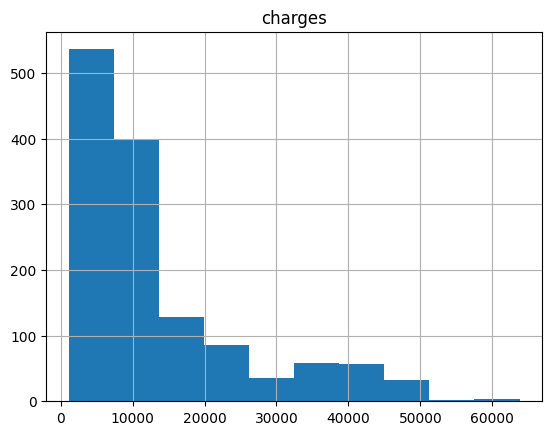

In [9]:
insurance.hist('charges')
plt.show()

### We will do a logarithmic conversion of the charges to make it less skewed and distribute it normally

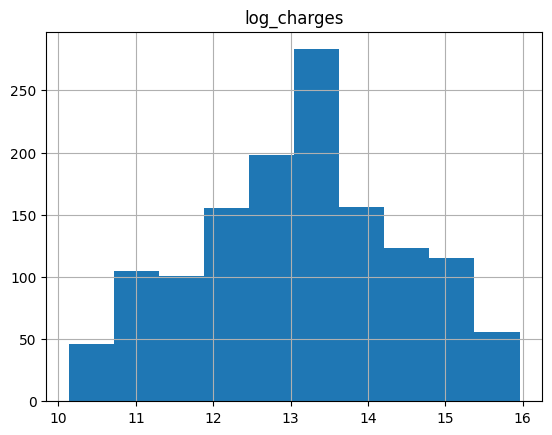

In [10]:
insurance['log_charges']=np.log2(insurance['charges'])
insurance.hist('log_charges')
plt.show()

In [11]:
correlations=insurance.corr(numeric_only=True)
correlations

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


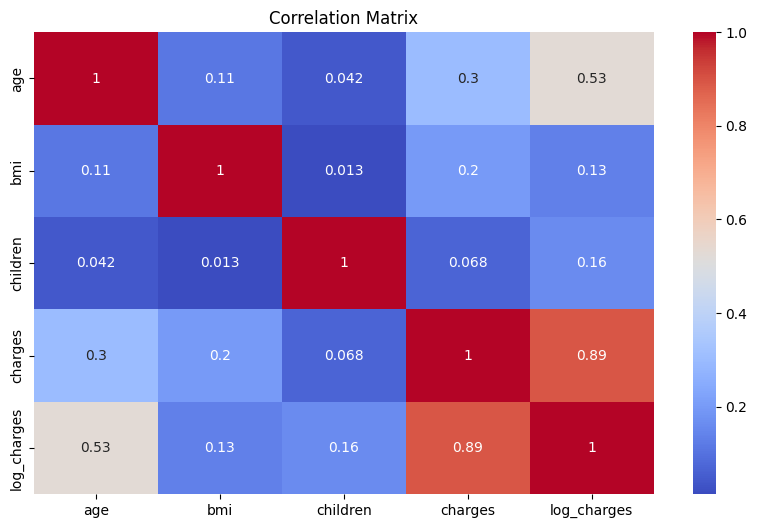

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### From the above Heat Map we can see that the important correlations are with log_charges and age and with log_charges and bmi

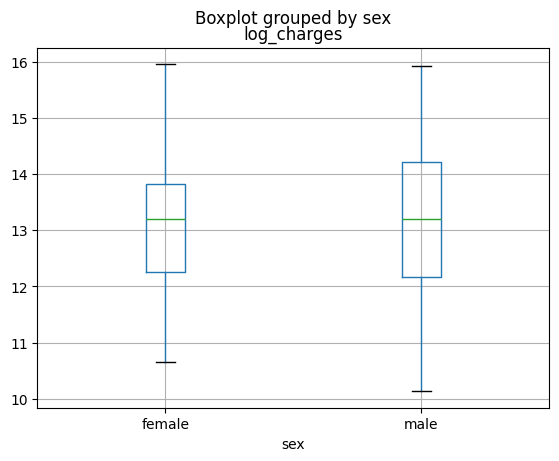

In [13]:
insurance.boxplot(column=['log_charges'],by='sex')
plt.show()

### If smoker then it is 1 and if not then 0

In [14]:
insurance['smoker']=insurance['smoker'].apply(lambda x: 1 if x=='yes' else 0)
insurance['log_bmi'] = np.log(insurance['bmi'])

In [15]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,log_bmi
0,19,female,27.900,0,1,southwest,16884.92400,14.043448,3.328627
1,18,male,33.770,1,0,southeast,1725.55230,10.752842,3.519573
2,28,male,33.000,3,0,southeast,4449.46200,12.119415,3.496508
3,33,male,22.705,0,0,northwest,21984.47061,14.424197,3.122585
4,32,male,28.880,0,0,northwest,3866.85520,11.916945,3.363149


In [16]:
correlations=insurance.corr(numeric_only=True)
correlations

,age,bmi,children,smoker,charges,log_charges,log_bmi
age,1.000000,0.109272,0.042469,-0.025019,0.299008,0.527834,0.116146
bmi,0.109272,1.000000,0.012759,0.003750,0.198341,0.132669,0.991023
children,0.042469,0.012759,1.000000,0.007673,0.067998,0.161336,0.013058
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251,0.665506,0.000366
charges,0.299008,0.198341,0.067998,0.787251,1.000000,0.892964,0.199266
log_charges,0.527834,0.132669,0.161336,0.665506,0.892964,1.000000,0.137924
log_bmi,0.116146,0.991023,0.013058,0.000366,0.199266,0.137924,1.000000


### Features I will be using age, bmi, smoker

In [17]:
X=insurance[['age','bmi','smoker']]
y=insurance['log_charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
insurance_model=LinearRegression()
insurance_model.fit(X_train,y_train)
print(insurance_model.coef_)
print(insurance_model.intercept_)

[0.0508618  0.01563733 2.23214787]
10.199942936238687


In [19]:
y_pred=insurance_model.predict(X_train)

In [20]:
y_pred

array([11.79052705, 12.03861881, 13.41469648, ..., 13.54359685,
       15.05831411, 13.46489784])

In [21]:
train_mse=mean_squared_error(y_train,y_pred)
train_mse

0.447919196329921

In [22]:
train_mse=np.exp2(mean_squared_error(y_train,y_pred))
train_mse

1.3640714326864816

In [23]:
train_r2=r2_score(y_train,y_pred)
train_r2

0.743333600772825

In [26]:
from sklearn.model_selection import cross_val_score
cv_r2 = cross_val_score(insurance_model, X, y, cv=5, scoring='r2')
print("Average CV R²:", cv_r2.mean())

Average CV R²: 0.7417981678677112


### After seeing the R2 score we can see the model can do better it is not the best

### We will see if Linear Regression is actually working or not by plotting the predicted and actual charges (it should not be a curve and it should be a straight line)

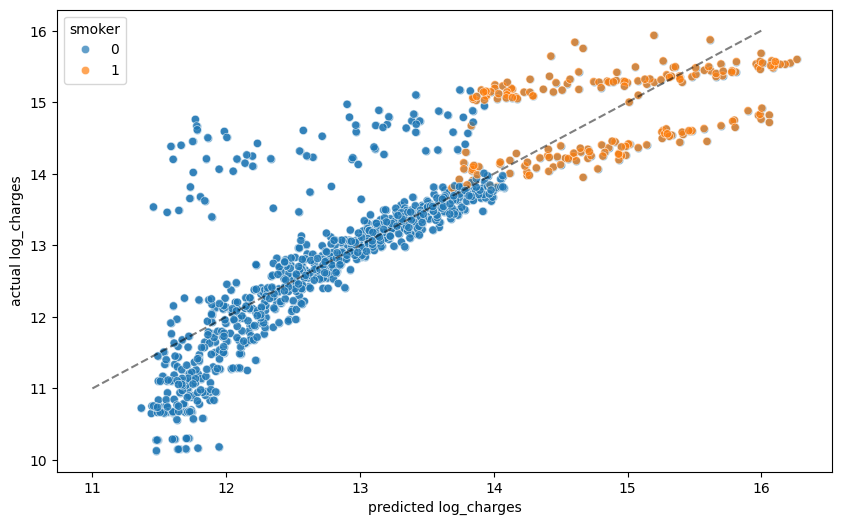

In [27]:
plot_df=pd.DataFrame({
    'predictions':y_pred,
    'actual':y_train,
    'smoker':X_train['smoker'],
    'age':X_train['age'],
    'bmi':X_train['bmi'],
    'residuals':y_train-y_pred
        })

plt.figure(figsize=(10,6))
sns.scatterplot(x='predictions',y='actual',
               data=plot_df, alpha=0.7)
plt.plot([11,16],[11,16],'k--',alpha=0.5)
sns.scatterplot(x='predictions',y='actual',data=plot_df,alpha=0.7,hue='smoker')
plt.xlabel('predicted log_charges')
plt.ylabel('actual log_charges')
plt.show()

### In the graph it is also visible that the smokers are mostly accumulated at high predicted log_charges it means that smoking increases your insurance charges exponentially

### We might use interactions to see if the result is better because in the above graph we can actually see a curve

In [28]:
insurance['age_smoker'] = insurance['age'] * insurance['smoker']
insurance['bmi_smoker'] = insurance['bmi'] * insurance['smoker']
insurance['age2']=insurance['age']**2
insurance['bmi2']=insurance['bmi']**2

### I will try to use some interactions and more features to see if our model does it better

In [48]:
X_new=insurance[['age', 'log_bmi', 'children', 'smoker', 
                   'age_smoker', 'bmi_smoker', 'age2', 'bmi2']]
y_new=insurance['log_charges']
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.25,random_state=42)

In [54]:
new_insurance_model=LinearRegression()
new_insurance_model.fit(X_train,y_train)
print(new_insurance_model.coef_)
print(new_insurance_model.intercept_)

[ 8.82043938e-02  9.69127117e-01  1.38442580e-01  1.82788613e+00
 -4.96204950e-02  7.55835326e-02 -3.50477303e-04 -5.27908692e-04]
6.883430184563129


In [55]:
train_pred = new_insurance_model.predict(X_train)

In [56]:
new_train_mse = mean_squared_error(y_train, train_pred)
print("Training MSE:", new_train_mse)

Training MSE: 0.30795256090553835


In [58]:
train_r2=r2_score(y_train,train_pred)
train_r2

0.8235372013790785

In [59]:
coefficients = pd.Series(new_insurance_model.coef_, index=X_new.columns)
print(coefficients.sort_values(ascending=False))

smoker        1.827886
log_bmi       0.969127
children      0.138443
age           0.088204
bmi_smoker    0.075584
age2         -0.000350
bmi2         -0.000528
age_smoker   -0.049620
dtype: float64


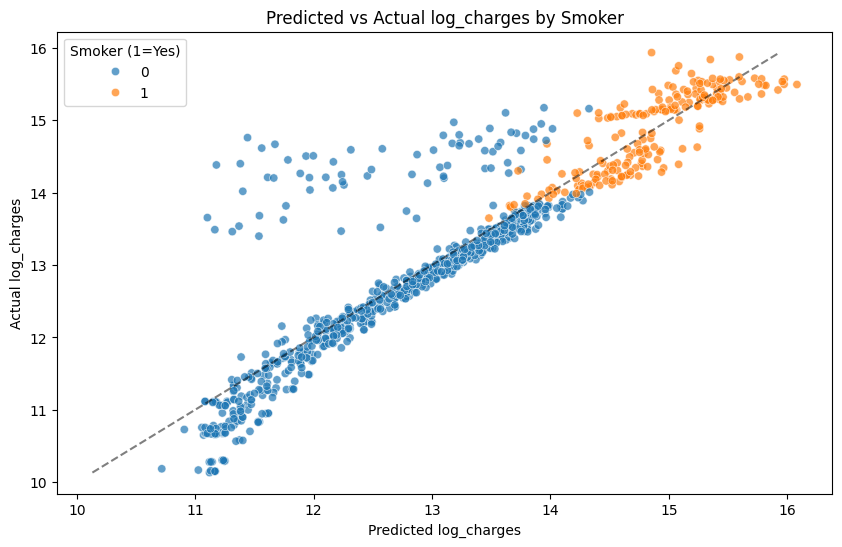

In [61]:
plot_df = pd.DataFrame({
    'predictions': new_y_pred,
    'actual': y_train,
    'smoker': X_train['smoker'],
    'age': X_train['age'],
    'bmi': X_train['log_bmi'],
    'residuals': y_train - new_y_pred
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='predictions', y='actual', data=plot_df, hue='smoker', alpha=0.7)

# Plot the perfect prediction line
plt.plot([plot_df['actual'].min(), plot_df['actual'].max()],
         [plot_df['actual'].min(), plot_df['actual'].max()],
         'k--', alpha=0.5)

plt.xlabel('Predicted log_charges')
plt.ylabel('Actual log_charges')
plt.title('Predicted vs Actual log_charges by Smoker')
plt.legend(title='Smoker (1=Yes)')
plt.show()

### This is more like a straight line 

In [62]:
from sklearn.model_selection import cross_val_score
cv_r2 = cross_val_score(new_insurance_model, X_new, y_new, cv=5, scoring='r2')
print("Average CV R²:", cv_r2.mean())

Average CV R²: 0.8179992861475125


In [63]:
test_pred = new_insurance_model.predict(X_test)
test_r2 = r2_score(y_test, test_pred)
test_mse = mean_squared_error(y_test, test_pred)

print("Test R²:", test_r2)
print("Test MSE:", test_mse)

Test R²: 0.8152781969407413
Test MSE: 0.33218726826532385


In [64]:
import joblib

joblib.dump(new_insurance_model, 'insurance_model.pkl')

['insurance_model.pkl']

### Logistic Regression

### We'll classify people as likely to buy insurance (1) or not (0) based on a proxy — for example, insurance charges. Higher charges = higher risk = more likely to buy insurance.

In [65]:
threshold = insurance['charges'].median()
insurance['bought_insurance'] = (insurance['charges'] > threshold).astype(int)

print(insurance['bought_insurance'].value_counts())

bought_insurance
1    669
0    669
Name: count, dtype: int64


In [66]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,log_bmi,age_smoker,bmi_smoker,age2,bmi2,bought_insurance
0,19,female,27.900,0,1,southwest,16884.92400,14.043448,3.328627,19,27.9,361,778.410000,1
1,18,male,33.770,1,0,southeast,1725.55230,10.752842,3.519573,0,0.0,324,1140.412900,0
2,28,male,33.000,3,0,southeast,4449.46200,12.119415,3.496508,0,0.0,784,1089.000000,0
3,33,male,22.705,0,0,northwest,21984.47061,14.424197,3.122585,0,0.0,1089,515.517025,1
4,32,male,28.880,0,0,northwest,3866.85520,11.916945,3.363149,0,0.0,1024,834.054400,0


In [69]:
X_new_log=insurance[['age', 'log_bmi', 'children', 'smoker', 
                   'age_smoker', 'bmi_smoker', 'age2', 'bmi2','log_charges']]
y_new_log=insurance['bought_insurance']
X_train,X_test,y_train,y_test=train_test_split(X_new_log,y_new_log,test_size=0.25,random_state=42)

In [70]:
from sklearn.linear_model import LogisticRegression
log_insurance_model=LogisticRegression()
log_insurance_model.fit(X_train,y_train)
print(log_insurance_model.coef_)
print(log_insurance_model.intercept_)

[[-1.93791994e+00 -6.35232878e-01  1.32581981e-01  2.08261631e-02
   6.51759236e-01  6.64081513e-01  2.72243262e-02  2.66764979e-04
   2.42272667e+00]]
[-0.22611022]


C:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = log_insurance_model.predict(X_test)
y_prob = log_insurance_model.predict_proba(X_test)[:, 1]  

print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc:.3f}")


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       172
           1       0.92      0.93      0.92       163

    accuracy                           0.93       335
   macro avg       0.93      0.93      0.93       335
weighted avg       0.93      0.93      0.93       335

Confusion Matrix:
[[159  13]
 [ 12 151]]
ROC AUC Score: 0.988


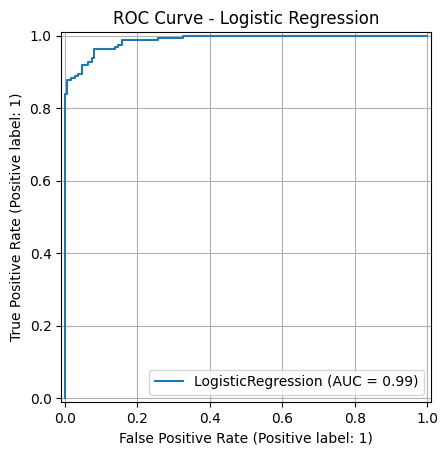

In [72]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_insurance_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.grid()
plt.show()

In [73]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,log_bmi,age_smoker,bmi_smoker,age2,bmi2,bought_insurance
0,19,female,27.900,0,1,southwest,16884.92400,14.043448,3.328627,19,27.9,361,778.410000,1
1,18,male,33.770,1,0,southeast,1725.55230,10.752842,3.519573,0,0.0,324,1140.412900,0
2,28,male,33.000,3,0,southeast,4449.46200,12.119415,3.496508,0,0.0,784,1089.000000,0
3,33,male,22.705,0,0,northwest,21984.47061,14.424197,3.122585,0,0.0,1089,515.517025,1
4,32,male,28.880,0,0,northwest,3866.85520,11.916945,3.363149,0,0.0,1024,834.054400,0


In [74]:
joblib.dump(log_insurance_model, 'insurance_log_model.pkl')

['insurance_log_model.pkl']

 ### The insurance cost increase exponentially for smokers compared to non-smokers

Text(0.5, 1.0, 'Impact of Age on Charges, split by Smoker Status')

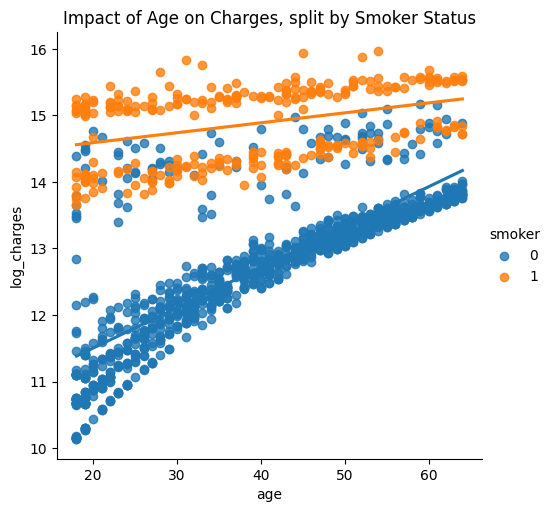

In [75]:
import seaborn as sns
sns.lmplot(x='age', y='log_charges', hue='smoker', data=insurance, ci=None)
plt.title("Impact of Age on Charges, split by Smoker Status")

### We will use SHAP to explain why the model suggested someone should or shouldn't buy insurance.
### SHAP helps us interpret:
### 1. Which user features (e.g., age, smoker status, BMI) most influenced that advice
### 2. Whether those features increased or decreased the likelihood of buying insurance

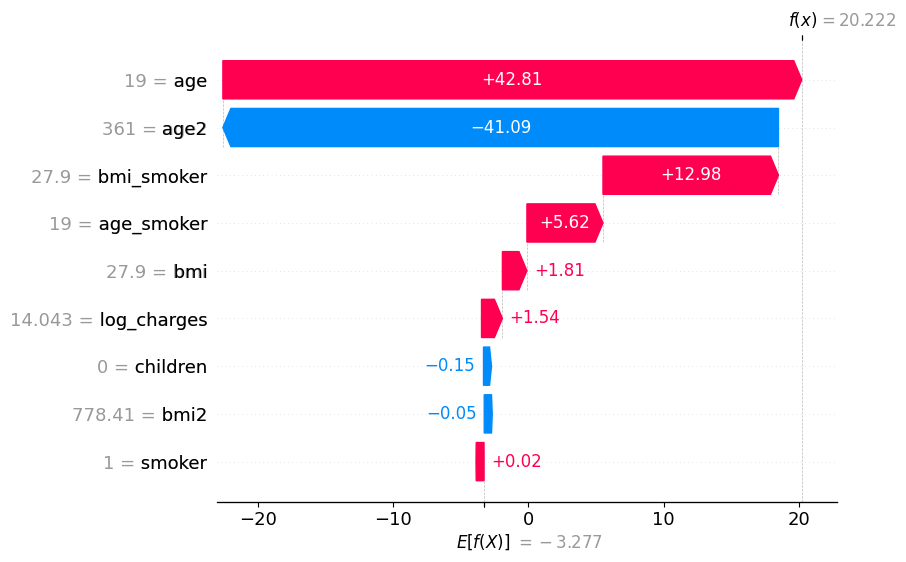

In [76]:
import shap

X_log = insurance[['age', 'bmi', 'children', 'smoker', 
                   'age_smoker', 'bmi_smoker', 'age2', 'bmi2','log_charges']]

explainer = shap.Explainer(log_insurance_model, X_log)
sample = X_log.iloc[[0]]

shap_values = explainer(sample)

shap.plots.waterfall(shap_values[0])
